## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [7]:
en_object = cptac.Endometrial()
desired_cutoff = .1

endometrial_freq_mut = al.get_frequently_mutated(en_object, cutoff=desired_cutoff)
#print(endometrial_freq_mut)

## Step 3: Select a gene from the list of frequently mutated genes above

Set the gene to which of the above frequently mutated genes you want to examine. For example, if you want to look at the gene PTEN, change the cell below to say "gene = 'ARID1A'"

In [8]:
gene = 'MUC16'

## Step 4: Select desired omics comparison

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [9]:
omics = en_object.get_proteomics()
#omics = en_object.get_transcriptomics()
#omics = en_object.get_phosphoproteomics()
#omics = en_object.get_acetylproteomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.
5. visualize comparison

In [10]:
gene = 'MUC16'
omics = en_object.get_proteomics()
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest - drop nan values
omics_and_mutations = en_object.append_mutations_to_omics(
    mutation_genes = gene, omics_df_name = omics.name, omics_genes = gene).dropna()

# Check if values in omics data
if omics_and_mutations[gene+"_"+omics.name].empty:
    print('Not possible to do T-test.')

else:
    # Step 2 - Create the binary column needed to do the comparison
    omics_and_mutations['binary_mutations'] = np.where(
        omics_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

    # Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
    tumors = omics_and_mutations.loc[omics_and_mutations['Sample_Status'] == 'Tumor']
    columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
    omics_binary_mutations = tumors.drop(columns_to_drop, axis = 1)

    # Make a list of the column label of omics to be used in the wrap_ttest function
    omics_col_list = [omics_binary_mutations.columns[0]] 

    # Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
    print("Doing t-test comparison for En\n")
    significant_pval_results = al.wrap_ttest(omics_binary_mutations, 'binary_mutations', omics_col_list)
    print('Significant Results:\n\n',significant_pval_results)



Doing t-test comparison for En

Significant Results:

          Comparison   P_Value
0  MUC16_proteomics  0.043761


# Repeat with the Colon dataset

In [11]:
colon_object = cptac.Colon()
desired_cutoff = .1

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff=desired_cutoff)

In [12]:
print(gene)
omics = colon_object.get_proteomics()
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest - drop nan values?
omics_and_mutations = colon_object.append_mutations_to_omics(
    mutation_genes = gene, omics_df_name = omics.name, omics_genes = gene).dropna()

# Check if values in omics data
if omics_and_mutations[gene+"_"+omics.name].empty:
    print('Not possible to do T-test.')

else:
    # Step 2 - Create the binary column needed to do the comparison
    omics_and_mutations['binary_mutations'] = np.where(
        omics_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

    # Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
    tumors = omics_and_mutations.loc[omics_and_mutations['Sample_Status'] == 'Tumor']
    columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
    co_omics_binary_mutations = tumors.drop(columns_to_drop, axis = 1)

    # Make a list of the column label of omics to be used in the wrap_ttest function
    omics_col_list = [co_omics_binary_mutations.columns[0]] 

    # Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
    print("Doing t-test comparison for colon\n")
    significant_pval_results = al.wrap_ttest(co_omics_binary_mutations, 'binary_mutations', omics_col_list)
    print(significant_pval_results)
   

MUC16
MUC16 did not match any columns in proteomics dataframe. MUC16_proteomics column inserted, but filled with NaN.
Not possible to do T-test.


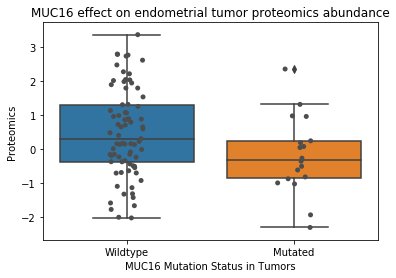

NameError: name 'co_omics_binary_mutations' is not defined

In [13]:
# Visualize endometrial comparison
en_cis_boxplot = sns.boxplot(data = omics_binary_mutations, x = "binary_mutations",
                          y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
en_cis_boxplot.set_title(gene + " effect on endometrial tumor " + omics.name + " abundance")
en_cis_boxplot = sns.stripplot(data=omics_binary_mutations, x = "binary_mutations",
                            y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

# Step 5 - Visualize colon comparison
cis_boxplot = sns.boxplot(data = co_omics_binary_mutations, x = "binary_mutations",
                          y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
cis_boxplot.set_title(gene + " effect on colon tumor " + omics.name + " abundance")
cis_boxplot = sns.stripplot(data = co_omics_binary_mutations, x = "binary_mutations",
                            y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()



Print the frequently mutated genes names for the colon dataset.

Create a dataframe of the frequently mutated genes in common between Colon and Endometrial datasets.

In [50]:
endometrial_genes = endometrial_freq_mut['Gene']
colon_genes = colon_freq_mut['Gene']
common_genes = pd.merge(endometrial_genes, colon_genes, how='inner')
e = list(common_genes['Gene'])
for i in e:
    print(i)

ARID1A
CCDC168
DOCK3
FBXW7
HERC2
KMT2B
KMT2D
KRAS
MUC16
OBSCN
PCLO
PIK3CA
RPL22
SYNE1
TP53
ZFHX4
ZNF469


Check difference in omics data between cancers.

In [102]:
#gene = 'ARID1A'

omics = colon_object.get_proteomics()
#omics = colon_object.get_transcriptomics()
#omics = colon_object.get_phosphoproteomics()
#omics = colon_object.get_acetylproteomics()

If gene does not match any columns in omics dataframe, skip the next cell.

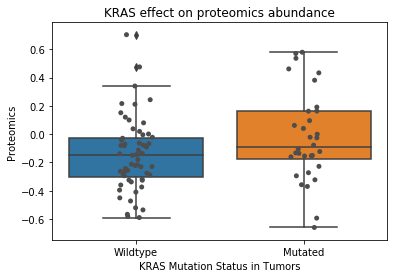

In [104]:
# Step 5 - Visualize comparison
cis_boxplot = sns.boxplot(data = co_omics_binary_mutations, x = "binary_mutations",
                          y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
cis_boxplot = sns.stripplot(data = co_omics_binary_mutations, x = "binary_mutations",
                            y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()



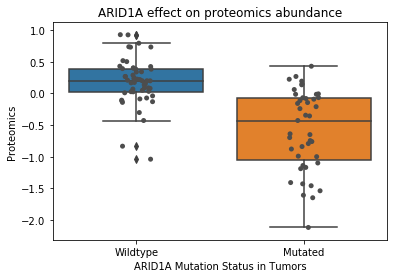

In [58]:
#endometrial
en_cis_boxplot = sns.boxplot(data = omics_binary_mutations, x = "binary_mutations",
                          y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
en_cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
en_cis_boxplot = sns.stripplot(data=omics_binary_mutations, x = "binary_mutations",
                            y = gene+"_proteomics",jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

# Repeat with Ovarian dataset

In [15]:
ovarian_object = cptac.Ovarian()
desired_cutoff = .1

ovarian_freq_mut = al.get_frequently_mutated(ovarian_object, cutoff=desired_cutoff)

In [31]:
ovarian_genes = ovarian_freq_mut['Gene']
pancancer_commonly_mutated_genes = pd.merge(common_genes, ovarian_genes, how='inner')
print(pancancer_commonly_mutated_genes)

    Gene
0  MUC16
1  MUC17
2  MUC5B
3   TP53


In [14]:
gene = 'MUC16'

omics = ovarian_object.get_proteomics()
#omics = ovarian_object.get_transcriptomics()
#omics = ovarian_object.get_phosphoproteomics()
#omics = ovarian_object.get_acetylproteomics()


NameError: name 'ovarian_object' is not defined

Doing t-test comparison

No significant comparisons.
None


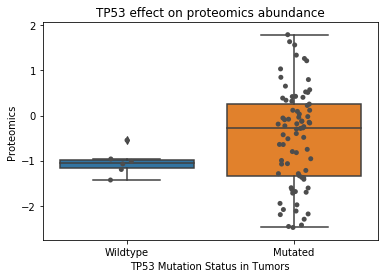

In [40]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest - drop nan values?
omics_and_mutations = ovarian_object.append_mutations_to_omics(
    mutation_genes = gene, omics_df_name = omics.name, omics_genes = gene).dropna()

# Check if values in omics data
if omics_and_mutations[gene+"_"+omics.name].empty:
    print('Not possible to do T-test with', omics.name + '.')

else:
    # Step 2 - Create the binary column needed to do the comparison
    omics_and_mutations['binary_mutations'] = np.where(
        omics_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

    # Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
    tumors = omics_and_mutations.loc[omics_and_mutations['Sample_Status'] == 'Tumor']
    columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
    ov_omics_binary_mutations = tumors.drop(columns_to_drop, axis = 1)

    # Make a list of the column label of omics to be used in the wrap_ttest function
    omics_col_list = [ov_omics_binary_mutations.columns[0]] 

    # Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
    print("Doing t-test comparison\n")
    significant_pval_results = al.wrap_ttest(ov_omics_binary_mutations, 'binary_mutations', omics_col_list)
    print(significant_pval_results)
    
    # Step 5 - Visualize comparison
    ov_cis_boxplot = sns.boxplot(data = ov_omics_binary_mutations, x = "binary_mutations",
                              y = gene+"_proteomics", order = ["Wildtype","Mutated"])  
    ov_cis_boxplot.set_title(gene + " effect on " + omics.name + " abundance")
    ov_cis_boxplot = sns.stripplot(
        data = ov_omics_binary_mutations, x = "binary_mutations",y = gene+"_proteomics", 
        jitter = True, color = ".3", order = ["Wildtype","Mutated"])
    ov_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
    plt.show()

